In [1]:
#Tarea 3 - Modelos probabílisticos de señales y sistemas
#Pierre Durán Guzmán
#B42323
#Grupo 01

In [2]:
#Importar las librerías a utilizar
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import mpl_toolkits.mplot3d as mpl
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [3]:
#Importar los archivos csv de X y Y
xy = pd.read_csv("xy.csv",header=0,index_col=0)
xyp=pd.read_csv("xyp.csv",header=0)

In [4]:
##Punto 1

#Primero debemos encontrar la mejor curva de ajuste (modelo probabilístico) 
#para las funciones de densidad marginales de X y Y

#declaramos los vectores de x y y a utilizar
#x iría de 5 a 15
xs=np.linspace(5,15,11)
#y iría de 5 a 25
ys=np.linspace(5,25,21)

#Luego calculamos los vectores que describen las funciones de densidad
#marginales de X y Y
X=np.sum(xy,axis=1) #suma a lo largo de y
print("La función de densidad marginal de X está descrita por:")
print(X)
Y=np.sum(xy,axis=0) #suma a lo largo de x
print("La función de densidad marginal de Y está descrita por:")
print(Y)

La función de densidad marginal de X está descrita por:
x5     0.06714
x6     0.07172
x7     0.08327
x8     0.09230
x9     0.12226
x10    0.14149
x11    0.12172
x12    0.09834
x13    0.07686
x14    0.05977
x15    0.06519
dtype: float64
La función de densidad marginal de Y está descrita por:
y5     0.03698
y6     0.03364
y7     0.03105
y8     0.03481
y9     0.03546
y10    0.03950
y11    0.04947
y12    0.04839
y13    0.06363
y14    0.08419
y15    0.07856
y16    0.08193
y17    0.06626
y18    0.05344
y19    0.04440
y20    0.03981
y21    0.03691
y22    0.03430
y23    0.04137
y24    0.02939
y25    0.03657
dtype: float64


In [5]:
#Una vez obtenidas las funciones de densidad marginales se procede 
#a graficar X y Y para ver su forma y encontrar la curva de ajuste
#que mejor se adapte a las graficas de las mismas

#Se observa que las graficas de X y Y tienen una forma de campana
#distorcionada por lo que se procede a realizar un ajuste con la 
#distribución Gaussiana

#se define primero la función de Gauss
def gauss(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

#se calculan los parámetros mu y sigma para la funcion marginal X
paramX,_=curve_fit(gauss,xs,X)
print("Los parametros de ajuste mu y sigma de la curva Gaussiana de X son:",paramX)

#se calculan los parámetros mu y sigma para la funcion marginal Y
paramY,_=curve_fit(gauss,ys,Y)
print("Los parametros de ajuste mu y sigma de la curva Gaussiana de Y son:",paramY)

Los parametros de ajuste mu y sigma de la curva Gaussiana de X son: [9.90484381 3.29944288]
Los parametros de ajuste mu y sigma de la curva Gaussiana de Y son: [15.0794609   6.02693776]


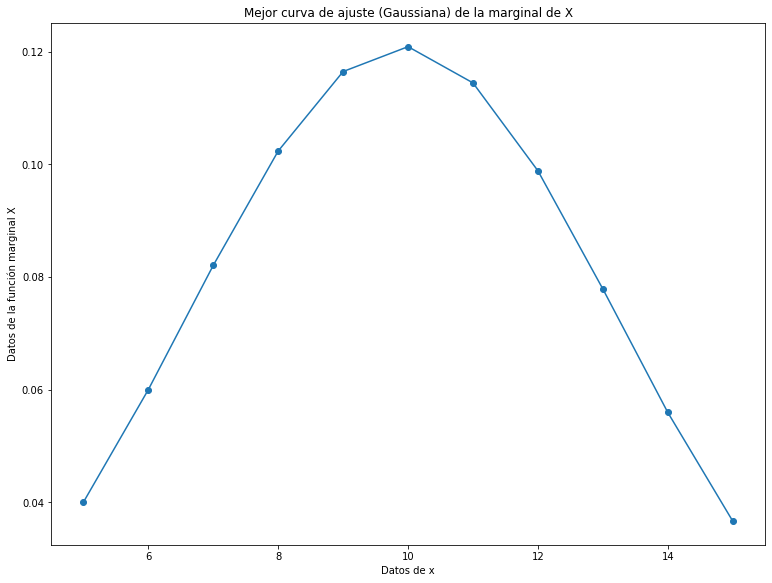

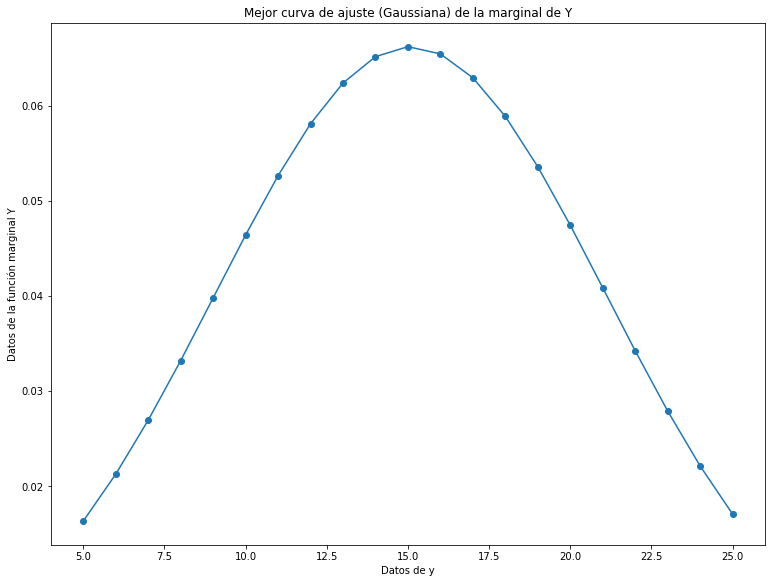

In [6]:
#Plot de la mejor curva de ajuste del modelo X obtenido
dist = stats.norm
pdf_fitted1 = dist.pdf(xs,*paramX)
plt.plot(xs, pdf_fitted1, 'o-')
plt.title("Mejor curva de ajuste (Gaussiana) de la marginal de X")
plt.xlabel("Datos de x")
plt.ylabel("Datos de la función marginal X")
plt.show()

#Plot de la mejor curva de ajuste del modelo Y obtenido
pdf_fitted2 = dist.pdf(ys, *paramY)
plt.plot(ys, pdf_fitted2, 'o-')
plt.title("Mejor curva de ajuste (Gaussiana) de la marginal de Y")
plt.xlabel("Datos de y")
plt.ylabel("Datos de la función marginal Y")
plt.show()

In [7]:
#Punto 3
#Primero se procede a calcular la correlación
#para ello, usaremos el csv de xyp ya que es una mejor forma de calularla
x1=xyp["x"]
y1=xyp["y"]
p=xyp["p"]

#Determinando la correlación
corre=0;
for i in range(231):
    corre=corre+x1[i]*y1[i]*p[i]
print("El valor de correlación de los datos es:", corre)

#Determinando la covarianza
covarianza=corre-(9.90484381*15.0794609)
print("El valor de la covarianza de los datos es:", covarianza)

#Determinando el coeficiente de correlación (Pearson)
Pearson=covarianza/((3.29944288)*(6.02693776))
print("El valor del coeficiente de correlación (Pearson) es:", Pearson)

El valor de correlación de los datos es: 149.54281000000012
El valor de la covarianza de los datos es: 0.183105046498099
El valor del coeficiente de correlación (Pearson) es: 0.009207950863939269


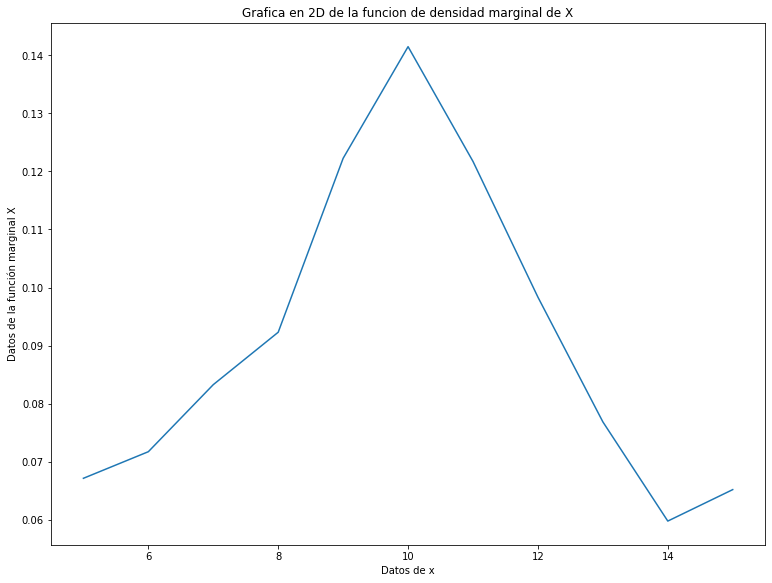

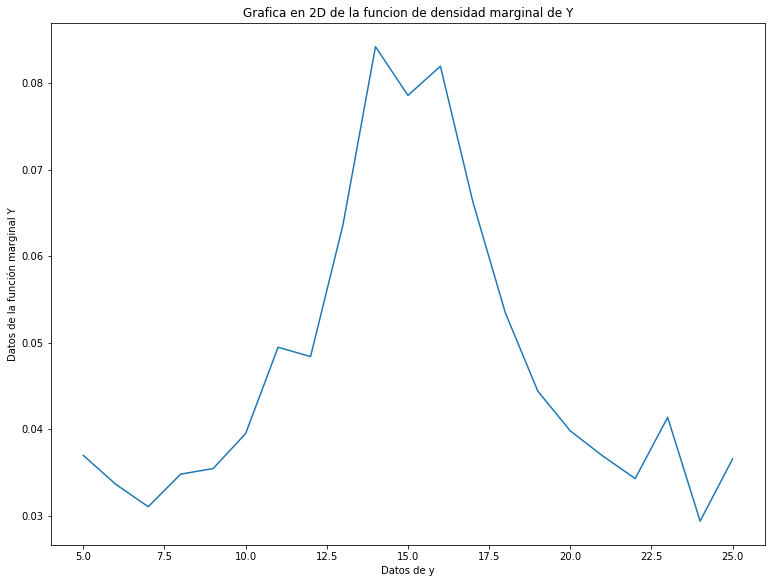

Text(0.5, 0, 'Datos de p')

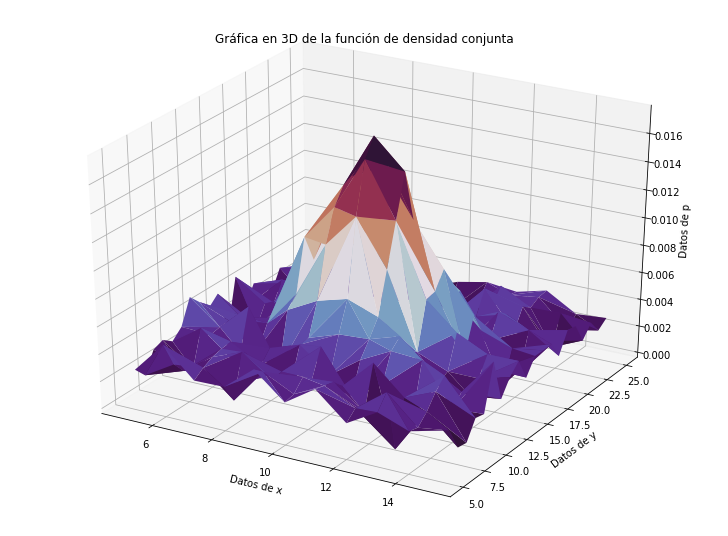

In [8]:
#Punto 4
#Primero se proceden a gráficar las funciones de densidad 
#marginales en 2D de X y Y
plt.plot(xs,X)
plt.title("Grafica en 2D de la funcion de densidad marginal de X")
plt.xlabel("Datos de x")
plt.ylabel("Datos de la función marginal X")
plt.show()

plt.plot(ys,Y)
plt.title("Grafica en 2D de la funcion de densidad marginal de Y")
plt.xlabel("Datos de y")
plt.ylabel("Datos de la función marginal Y")
plt.show()

#Ahora, se procede a graficar la función de densidad conjunta
#en #d de los datos brindados
ax=plt.axes(projection='3d')
x3=x1
y3=y1
z3=p
ax.plot_trisurf(x3,y3,z3,cmap='twilight_shifted')
ax.set_title("Gráfica en 3D de la función de densidad conjunta")
ax.set_xlabel("Datos de x")
ax.set_ylabel("Datos de y")
ax.set_zlabel("Datos de p")